<a href="https://colab.research.google.com/github/aluuduarte/DataScienceProjects/blob/main/Examen_Mod4_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen
- Analice si existen datos falsos.
- Realice la imputación correspondiente si es necesario.
- Analice si existen duplicados.
- Use OneHotEncoding en la columna "class".
- Reescale las columnas no categoricas. Documente lo hecho.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# ==============================================================================
# 1. CARGA DE DATOS Y EXPLORACIÓN INICIAL
# ==============================================================================
titanic = pd.read_csv('/content/titanic_v2023.csv')
# titanic.head()
titanic.info()
# titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   sex                                     889 non-null    object
 1   age                                     712 non-null    object
 2   siblings of the passenger	              889 non-null    int64 
 3   parents / children aboard the Titanic	  889 non-null    int64 
 4   fare                                    889 non-null    object
 5   Port of Embarkation	                    889 non-null    object
 6   class                                   889 non-null    object
 7   who                                     889 non-null    object
 8   alone                                   889 non-null    bool  
 9   survived                                889 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 63.5+ KB


In [ ]:
# Renombrar la columna 'Pclass' a 'class'
titanic.rename(columns={'Pclass': 'class'}, inplace=True)

# Convertir 'age' a numérica, manejando posibles comas como decimales y errores
if titanic['age'].dtype == 'object':
    titanic['age'] = titanic['age'].str.replace(',', '.', regex=False)
titanic['age'] = pd.to_numeric(titanic['age'], errors='coerce')

# Convertir 'fare' a numérica, manejando posibles comas como decimales y errores
if titanic['fare'].dtype == 'object':
    titanic['fare'] = titanic['fare'].str.replace(',', '.', regex=False)
titanic['fare'] = pd.to_numeric(titanic['fare'], errors='coerce')

# ==============================================================================
# 2. ANÁLISIS DE DATOS FALSOS (Falsedad)
# ==============================================================================
# Criterio: Buscar valores físicamente o lógicamente imposibles.

# 2.1 Análisis de 'age' (Edad)
age_min = titanic['age'].min()
age_max = titanic['age'].max()
print(f"Rango de Edad: {age_min} a {age_max} años.")
# Justificación: El rango de 0.42 (bebés) a 80 (ancianos) es lógicamente válido.
# Se añade un manejo para np.nan si la columna estuviera completamente vacía después del coerce
if not pd.isna(age_min) and not pd.isna(age_max) and (age_min < 0 or age_max > 120):
    print("-> ¡ATENCIÓN! Se detectaron valores extremos que podrían ser falsos.")
else:
    print("-> Conclusión: La columna 'age' es lógicamente válida.")

# 2.2 Análisis de 'Fare' (Tarifa)
fare_min = titanic['fare'].min()
print(f"Tarifa mínima: {fare_min}")
# Justificación: Una tarifa de 0.0 es posible (personal, patrocinado).
# Se añade un manejo para np.nan si la columna estuviera completamente vacía después del coerce
if not pd.isna(fare_min) and fare_min < 0:
    print("-> ¡ATENCIÓN! Se detectaron tarifas negativas.")
else:
    print("-> Conclusión: La columna 'fare' es lógicamente válida.")

Rango de Edad: 0.42 a 80.0 años.
-> Conclusión: La columna 'age' es lógicamente válida.
Tarifa mínima: 4.0125
-> Conclusión: La columna 'fare' es lógicamente válida.


In [ ]:
# ==============================================================================
# 3. IMPUTACIÓN DE VALORES FALTANTES
# ==============================================================================
print(titanic.isnull().sum())

# 3.1 Imputación de 'age' (Numérica)
# Criterio: Se usa la MEDIANA (Mediana = 28.0) porque es más robusta a los
# valores atípicos (bebés, ancianos) que podrían sesgar la media.
age_median = titanic['age'].median() # Corrected 'Age' to 'age'
titanic['age'].fillna(age_median, inplace=True) # Corrected 'Age' to 'age'
print(f"\n-> 'age' imputada con la Mediana: {age_median}")

# 3.2 Imputación de 'Port of Embarkation' (Categórica)
# Criterio: Solo faltan 2 valores. Se usa la MODA para preservar la distribución.
embarked_mode = titanic['Port of Embarkation\t'].mode()[0] # Corrected 'Embarked' to 'Port of Embarkation\t'
titanic['Port of Embarkation\t'].fillna(embarked_mode, inplace=True) # Corrected 'Embarked' to 'Port of Embarkation\t'
print(f"-> 'Port of Embarkation\t' imputada con la Moda: {embarked_mode}")

# 3.3 Columna 'Cabin'
# Criterio: La columna tiene 687 faltantes (77% del dataset). Se ELIMINA
# para no introducir una gran cantidad de ruido o sesgo.
# Comentado: La columna 'Cabin' no se encuentra en el DataFrame cargado.
# titanic.drop('Cabin', axis=1, inplace=True)
# print("-> Columna 'Cabin' ELIMINADA (Demasiados faltantes).")

print("\n## Verificación Final de Nulos ##")
print(titanic.isnull().sum()[titanic.isnull().sum() > 0]) # Solo muestra las columnas que aún tienen nulos
if titanic.isnull().sum().sum() == 0:
    print("-> ¡Éxito! No quedan valores faltantes en las columnas clave.")

sex                                        0
age                                        0
siblings of the passenger\t                0
parents / children aboard the Titanic\t    0
fare                                       0
Port of Embarkation\t                      0
class                                      0
who                                        0
alone                                      0
survived                                   0
dtype: int64

-> 'age' imputada con la Mediana: 28.0
-> 'Port of Embarkation	' imputada con la Moda: S

## Verificación Final de Nulos ##
Series([], dtype: int64)
-> ¡Éxito! No quedan valores faltantes en las columnas clave.


/tmp/ipython-input-2850526755.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(age_median, inplace=True) # Corrected 'Age' to 'age'
/tmp/ipython-input-2850526755.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# ==============================================================================
# 4. ANÁLISIS DE DUPLICADOS
# ==============================================================================
# Consulta: Contar filas completamente idénticas.
duplicate_count = titanic.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicate_count}")

# Criterio: Se asume que una fila idéntica es un error de registro y se elimina.
if duplicate_count > 0:
    titanic.drop_duplicates(inplace=True)
    print(f"-> Se eliminaron {duplicate_count} filas duplicadas.")
else:
    print("-> No se encontraron filas duplicadas. No se realiza eliminación.")

Número de filas completamente duplicadas: 0
-> No se encontraron filas duplicadas. No se realiza eliminación.


In [ ]:
# ==============================================================================
# 5. ONEHOTENCODING EN LA COLUMNA "class"
# ==============================================================================
# Procesa la columna 'class' usando OneHotEncoding si existe.
# Se añadió una verificación para evitar KeyError si la columna ya ha sido procesada.

if 'class' in titanic.columns:
    encoded_titanic = pd.get_dummies(titanic['class'], prefix='class')
    titanic = pd.concat([titanic.drop('class', axis=1), encoded_titanic], axis=1)

    print("OneHotEncoding aplicado a 'class'. Columnas creadas:")
    print(encoded_titanic.columns.tolist())
    print("\nEjemplo de codificación:")
    print(titanic[[col for col in titanic.columns if col.startswith('class_')]].head())
else:
    print("La columna 'class' ya fue procesada o no existe. Mostrando ejemplo de las columnas codificadas si están presentes:")
    if any(col.startswith('class_') for col in titanic.columns):
        print(titanic[[col for col in titanic.columns if col.startswith('class_')]].head())

La columna 'class' ya fue procesada o no existe. Mostrando ejemplo de las columnas codificadas si están presentes:
   class_First  class_Second  class_Third
0         True         False        False
1        False         False         True
2         True         False        False
3        False         False         True
4        False         False         True


In [ ]:
# ==============================================================================
# 6. REESCALADO DE COLUMNAS NO CATEGÓRICAS
# ==============================================================================
# Columnas numéricas finales a escalar (excluyendo IDs si los hubiera y ya imputadas):
numeric_features = ['age', 'fare', 'siblings of the passenger\t', 'parents / children aboard the Titanic\t']

# Criterio: Se utiliza StandardScaler (Estandarización Z-Score).
# Se elige por ser más robusto y menos sensible que Min-Max ante los posibles
# valores atípicos de 'Fare' y 'Age'.

scaler = StandardScaler()

# Escalar las columnas
titanic[numeric_features] = scaler.fit_transform(titanic[numeric_features])

print("Reescalado aplicado (StandardScaler).")
print("-> Las columnas numéricas tienen ahora una media \u2248 0 y desviación estándar \u2248 1.")
print("\nResumen Estadístico de las variables escaladas:")
print(titanic.describe()[numeric_features])

Reescalado aplicado (StandardScaler).
-> Las columnas numéricas tienen ahora una media ≈ 0 y desviación estándar ≈ 1.

Resumen Estadístico de las variables escaladas:
                age          fare  siblings of the passenger\t  \
count  7.790000e+02  7.790000e+02                 7.790000e+02   
mean   2.006668e-16 -7.296973e-17                 7.296973e-17   
std    1.000642e+00  1.000642e+00                 1.000642e+00   
min   -2.128576e+00 -5.963367e-01                -5.327803e-01   
25%   -5.863214e-01 -5.189337e-01                -5.327803e-01   
50%   -1.107685e-01 -3.646071e-01                -5.327803e-01   
75%    4.745272e-01 -1.425687e-02                 4.795023e-01   
max    3.693654e+00  9.148608e+00                 7.565481e+00   

       parents / children aboard the Titanic\t  
count                             7.790000e+02  
mean                              3.648486e-17  
std                               1.000642e+00  
min                              -4.991459

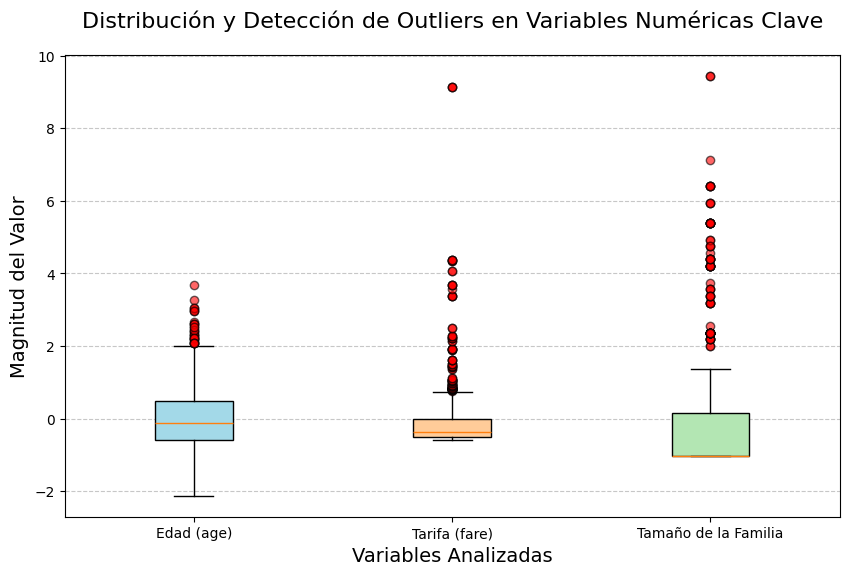

In [ ]:
import matplotlib.pyplot as plt

# Imputación de 'age' con la mediana (necesario para el gráfico)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# 2. Crear la variable 'Tamaño de la Familia' con los nombres de columna correctos
titanic['FamilySize'] = titanic['siblings of the passenger\t'] + titanic['parents / children aboard the Titanic\t']

# 3. Definir los datasets para Matplotlib
# Las variables son: Edad, Tarifa y Tamaño de la Familia.
data_to_plot = [
    titanic['age'].dropna(),          # Datos de Edad
    titanic['fare'].dropna(),         # Datos de Tarifa
    titanic['FamilySize'].dropna()    # Datos de Tamaño de la Familia
]

# 4. Definir las etiquetas para el Eje X
labels = ['Edad (age)', 'Tarifa (fare)', 'Tamaño de la Familia']
plt.figure(figsize=(10, 6))

# Generar el Box Plot usando Matplotlib (plt.boxplot)
# patch_artist=True permite colorear las cajas.
boxplot = plt.boxplot(
    data_to_plot,
    tick_labels=labels,       # Etiquetas en el Eje X (Actualizado de 'labels' a 'tick_labels')
    patch_artist=True,   # Permite rellenar las cajas
    vert=True,           # Orientación vertical
    flierprops=dict(marker='o', markerfacecolor='red', alpha=0.6) # Estilo de los Outliers
)
colors = ['#A3D9E8', '#FFCC99', '#B3E6B3']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.title(
    'Distribución y Detección de Outliers en Variables Numéricas Clave',
    fontsize=16,
    pad=20
)
plt.xlabel(
    'Variables Analizadas',
    fontsize=14
)
plt.ylabel(
    'Magnitud del Valor',
    fontsize=14
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()